# Assignment

# Data Mining (ISZC415)

## Dataset Selection

### https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

## Group Info

### AYUSHI KAUSHIK - 2021MT12433
### ASHISH BANSAL - 2021MT12174
### PUSHPRAJ SINGH CHAUHAN - 2021MT12161
### PRAKHAR SINHA - 2021MT13109

**Dataset Information**
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

**Content**<br>
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

In [3]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the data

df = pd.read_csv('UCI_Credit_Card.csv')
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

**As a firststep, let's have a look if there are missing data or anomalous data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

**Categorical variables**
* SEX
* EDUCATION
* MARRIAGE
* AGE

In [6]:
df[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe()

,SEX,EDUCATION,MARRIAGE,AGE
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,35.485500
std,0.489129,0.790349,0.521970,9.217904
min,1.000000,0.000000,0.000000,21.000000
25%,1.000000,1.000000,1.000000,28.000000
50%,2.000000,2.000000,2.000000,34.000000
75%,2.000000,2.000000,2.000000,41.000000
max,2.000000,6.000000,3.000000,79.000000


**No missing data, but a few anomalous data found as below:**
* **EDUCATION** has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.
* **MARRIAGE** has a label 0 that is undocumented
We dont find any anomaly in AGE and SEX

**Checking Payment delay data**

In [7]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


**No missing data, but a few anomalous data found as below:**
* Undocumented label -2 found. 
* If 1,2,3, etc are the months of delay, 0 shall be labeled as 'pay duly' 
* All negative value consider as a 0.

**Checking Bill statement Data**

In [8]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


**No missing data, but a few anomalous data found as below:**
* Many negative values found.

**Checking Previous payment data**

In [9]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


**No missing data, but range is Broad**

In [10]:
df.LIMIT_BAL.describe()

**No missing data, but range is Broad**

1. Column -PAY_0 renamed to PAY_1
2.Column - Default.payment.next.months renamed to default_payment

In [11]:
df = df.rename(columns={'default.payment.next.month': 'default_payment', 
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Probability of default**

In [12]:
df.default_payment.sum() / len(df.default_payment)

0.2212

In [13]:
# Other ways of getting this kind of numbers (as a reference for newbies like myself)
print(df.shape)
print(df.shape[0])
print(df.default_payment.count())
print(len(df.axes[1]))

(30000, 25)
30000
30000
25


# **Data exploration**<br>
<br>

**Categorical variables**<br>
That are SEX, MARRIAGE, EDUCATION,AGE I want to see both how our dataset is divided and if there are sparse classes which can cause overfit of our model

In [14]:
df.SEX.value_counts() #2-Women,1-Men

**More women than men**

In [15]:
df['MARRIAGE'].value_counts()

In [16]:
df.EDUCATION.value_counts() # yes, I am using different ways of calling a column

In [17]:
df.AGE.value_counts()

**Plot**

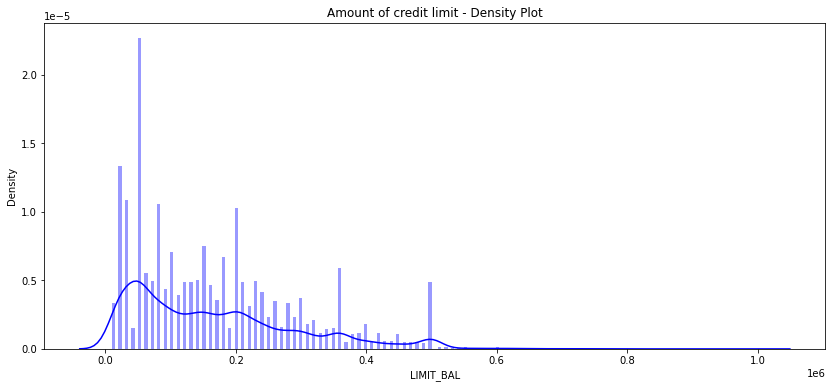

In [18]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

**Credit limit vs. sex**

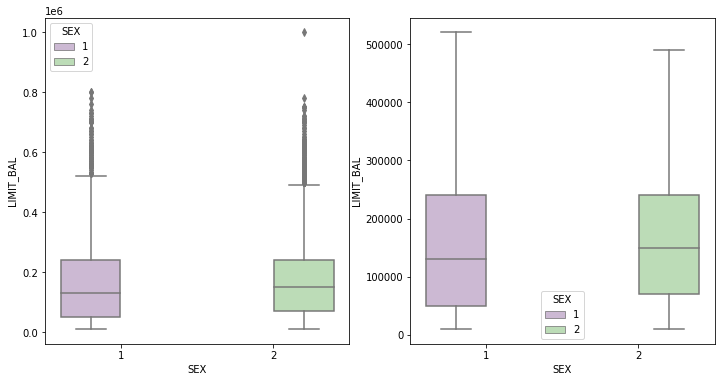

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=False)
plt.show();

The limit credit amount is quite balanced between sexes. The males have a slightly smaller Q2 and larger Q3 and Q4 and a lower mean. The female have a larger outlier max value

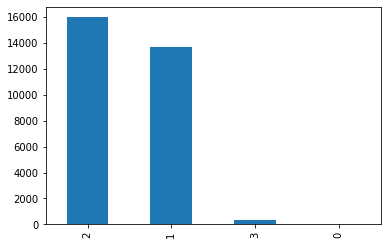

In [20]:
df.MARRIAGE.value_counts().plot(kind = 'bar')

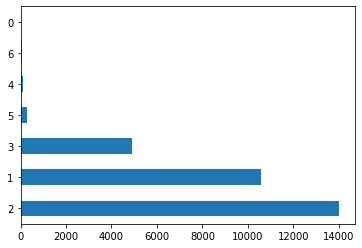

In [21]:
df.EDUCATION.value_counts().plot(kind = "barh")

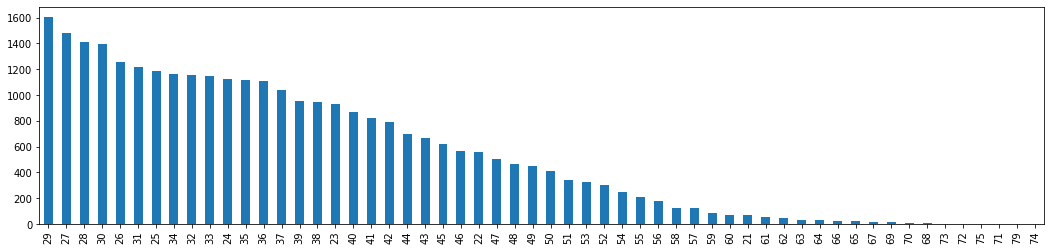

In [22]:
df.AGE.value_counts().plot(kind = "bar", figsize=(18, 4))



## Numerical variables

We will be using histograms to see the data distribution and check if there are any outliers present

In [23]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

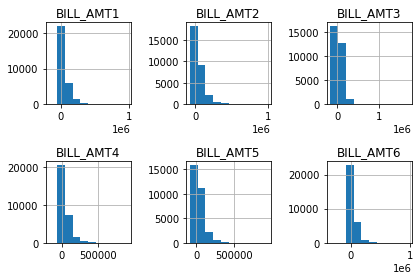

In [24]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2,3, 10)

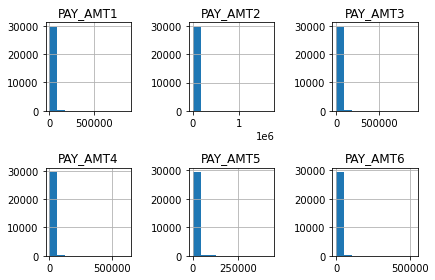

In [25]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 10)

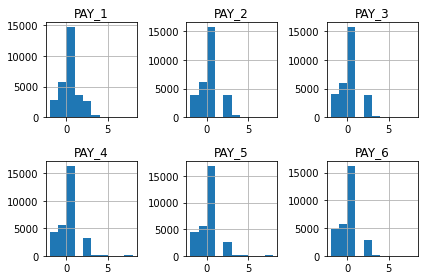

In [26]:
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

#this is probably more of a category

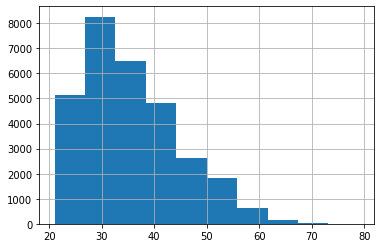

In [27]:
df.AGE.hist()

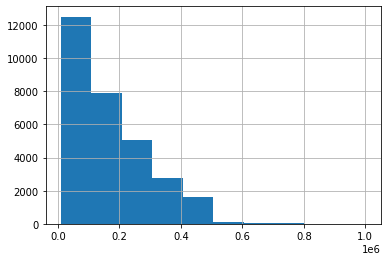

In [28]:
df.LIMIT_BAL.hist(bins = 10)

*Range of Limit balance is broad, which can cause problems to some models.*

# Data Cleaning - It is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

As seen earlier, some categories are mislabeled or undocumented.<br>

The 0 in *MARRIAGE* categorized as 'Others' (as 3). 

The 0 (undocumented), 5 and 6 (label unknown) in *EDUCATION* can also be put in a 'Other' cathegory (as 4)

In [29]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

**1=graduate school, 2=university, 3=high school, 4=others**

In [30]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

**1=married, 2=single, 3=others**

**Repayment status PAY_n** <br>
As given in documentation (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
Unknown Values -2 and 0? adjusted to 0 for pay duly.

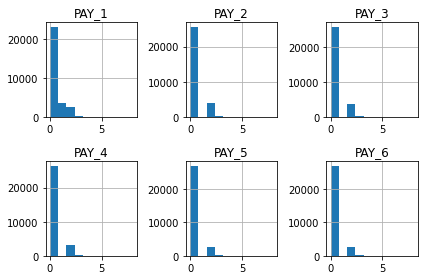

In [31]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [32]:

df[df.PAY_AMT1 > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2', 
                          'PAY_AMT1', 'BILL_AMT1', 'default_payment']]
# doesn't look weird after all

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,default_payment
2687,500000.0,0,0,367979.0,368199.0,71921.0,0
5687,480000.0,0,0,400000.0,302000.0,106660.0,0
8500,400000.0,0,0,405016.0,405016.0,6500.0,0
12330,300000.0,1,0,324392.0,505000.0,-165580.0,0
25431,170000.0,0,0,167941.0,304815.0,30860.0,0
28003,510000.0,0,0,481382.0,493358.0,71121.0,0
28716,340000.0,0,0,176743.0,873552.0,139808.0,0
29820,400000.0,1,0,394858.0,423903.0,396343.0,0
29867,340000.0,0,0,331641.0,300039.0,44855.0,0
29963,610000.0,0,0,322228.0,323014.0,348392.0,0


In [33]:
df[df.PAY_AMT2 > 300000][['LIMIT_BAL', 'PAY_2', 'PAY_3', 'BILL_AMT3', 
                          'PAY_AMT2', 'BILL_AMT2', 'default_payment']]

,LIMIT_BAL,PAY_2,PAY_3,BILL_AMT3,PAY_AMT2,BILL_AMT2,default_payment
2592,480000.0,0,0,339176.0,344261.0,38929.0,0
3774,500000.0,0,0,301441.0,302961.0,39356.0,0
5296,500000.0,0,0,1664089.0,1684259.0,-18088.0,0
5400,500000.0,0,0,385228.0,385228.0,8970.0,0
6150,300000.0,0,0,4735.0,344467.0,-5973.0,1
6864,500000.0,0,0,444462.0,300018.0,201402.0,0
9044,500000.0,0,0,384973.0,384986.0,24201.0,0
11568,430000.0,0,0,354716.0,358689.0,960.0,1
11853,360000.0,1,0,338600.0,361560.0,-22960.0,0
12829,340000.0,0,0,330510.0,312723.0,335584.0,1


# Correlations
**Correlations with the target variable**

The goal is to see how relevant each feature is.

In [34]:
gender = df.groupby(['SEX', 'default_payment']).size().unstack(1)
gender

default_payment,0,1
SEX,,
1,9015,2873
2,14349,3763


In [35]:
pd.crosstab(df.SEX, df.default_payment)

default_payment,0,1
SEX,,
1,9015,2873
2,14349,3763


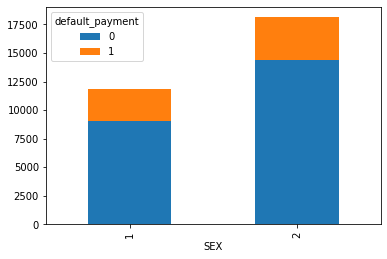

In [36]:
gender.plot(kind='bar', stacked = True)

In [37]:
gender['perc'] = (gender[1]/(gender[0] + gender[1])) 
#this creates a new column in our dataset
gender

default_payment,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


 Let's see a slightly different way of obtaining the same percentages.

In [38]:
df[["SEX", "default_payment"]].groupby(['SEX'], 
                                        as_index=False).mean().sort_values(by='default_payment', 
                                                                           ascending=False)

,SEX,default_payment
0,1,0.241672
1,2,0.207763


In [39]:
df[["SEX", "default_payment"]].groupby(['SEX']).mean().sort_values(by='default_payment')

,default_payment
SEX,
2,0.207763
1,0.241672


Considering that about 22% of the customers will default, we see a couple of things:
* there are significantly more women than men
* men are most likely going to default the next month

**Correlation Function**

In [40]:
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [41]:
corr_2_cols('EDUCATION', 'default_payment')

default_payment,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


It seems that the higher is the **Education**, the **lower** is the **probability of defaulting the next month.**

In [42]:
corr_2_cols('MARRIAGE', 'default_payment')

default_payment,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


Here it seems that married people are most likely to default

In [43]:
corr_2_cols('MARRIAGE', 'SEX')

SEX,1,2,perc
MARRIAGE,,,
1,5190,8469,0.620031
2,6553,9411,0.589514
3,145,232,0.615385


In [44]:
corr_2_cols('EDUCATION', 'SEX')

SEX,1,2,perc
EDUCATION,,,
1,4354,6231,0.588663
2,5374,8656,0.616964
3,1990,2927,0.595282
4,170,298,0.636752


In [45]:
df[['PAY_AMT6', 'BILL_AMT6', 'PAY_AMT5', 
     'BILL_AMT5', 'PAY_AMT4', 'BILL_AMT4', 'PAY_AMT3', 'BILL_AMT3', 
     'PAY_AMT2', 'BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1',
     'LIMIT_BAL', 'default_payment']].sample(30)

,PAY_AMT6,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_AMT4,BILL_AMT4,PAY_AMT3,BILL_AMT3,PAY_AMT2,BILL_AMT2,PAY_AMT1,BILL_AMT1,LIMIT_BAL,default_payment
26316,1000.0,23159.0,1000.0,49443.0,1600.0,88344.0,59000.0,58083.0,3503.0,83403.0,5712.0,99302.0,100000.0,0
12519,0.0,101935.0,2000.0,101280.0,5450.0,96975.0,3000.0,96461.0,1300.0,97634.0,2900.0,97156.0,100000.0,1
24521,2000.0,43952.0,3000.0,41793.0,2000.0,40468.0,3000.0,38420.0,2000.0,37323.0,2000.0,35923.0,170000.0,0
2236,237.0,19167.0,815.0,18776.0,800.0,19270.0,700.0,49158.0,1298.0,48923.0,2063.0,49076.0,50000.0,0
27116,8000.0,95373.0,3500.0,93536.0,93536.0,1991.0,0.0,1991.0,1991.0,0.0,0.0,0.0,100000.0,0
5076,1500.0,30169.0,1500.0,29311.0,1500.0,28424.0,1500.0,27687.0,1500.0,26937.0,1800.0,25859.0,50000.0,0
7597,491.0,9588.0,9588.0,9500.0,0.0,10555.0,10555.0,1395.0,1395.0,274.0,274.0,7702.0,20000.0,1
23502,3000.0,58520.0,3033.0,66828.0,45.0,77102.0,2559.0,78380.0,6000.0,78328.0,3550.0,86082.0,310000.0,0
24631,1157.0,1801.0,1801.0,598.0,598.0,2202.0,2202.0,2429.0,2429.0,995.0,995.0,610.0,170000.0,0
11330,3039.0,124882.0,5063.0,128742.0,5007.0,131103.0,5027.0,298378.0,15056.0,291480.0,12507.0,285038.0,300000.0,0


In [46]:
df[df.default_payment == 1][['BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1', 'PAY_1',
     'LIMIT_BAL']].sample(30)

,BILL_AMT2,PAY_AMT1,BILL_AMT1,PAY_1,LIMIT_BAL
20983,20690.0,3500.0,17497.0,2,20000.0
8020,30900.0,1600.0,30488.0,0,30000.0
29391,0.0,0.0,0.0,1,200000.0
4752,8481.0,0.0,8766.0,1,20000.0
14176,29503.0,1802.0,32202.0,2,60000.0
2976,223.0,223.0,34000.0,0,110000.0
8216,17759.0,1307.0,16728.0,0,20000.0
24405,18756.0,0.0,19481.0,1,20000.0
3247,114252.0,5300.0,111840.0,2,120000.0
21609,27295.0,1450.0,28277.0,0,60000.0


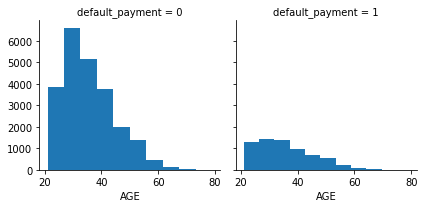

In [47]:
g = sns.FacetGrid(df, col = 'default_payment')
g.map(plt.hist, 'AGE')

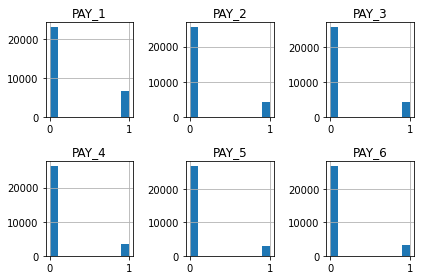

In [48]:
df.loc[df.PAY_1 > 0, 'PAY_1'] = 1
df.loc[df.PAY_2 > 0, 'PAY_2'] = 1
df.loc[df.PAY_3 > 0, 'PAY_3'] = 1
df.loc[df.PAY_4 > 0, 'PAY_4'] = 1
df.loc[df.PAY_5 > 0, 'PAY_5'] = 1
df.loc[df.PAY_6 > 0, 'PAY_6'] = 1
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

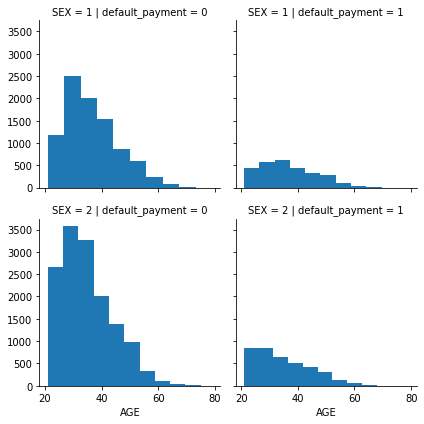

In [49]:
g = sns.FacetGrid(df, col = 'default_payment', row = 'SEX')
g.map(plt.hist, 'AGE')

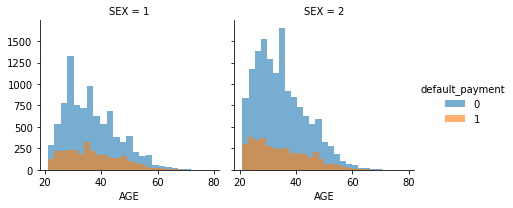

In [50]:
g = sns.FacetGrid(df, col='SEX', hue='default_payment')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

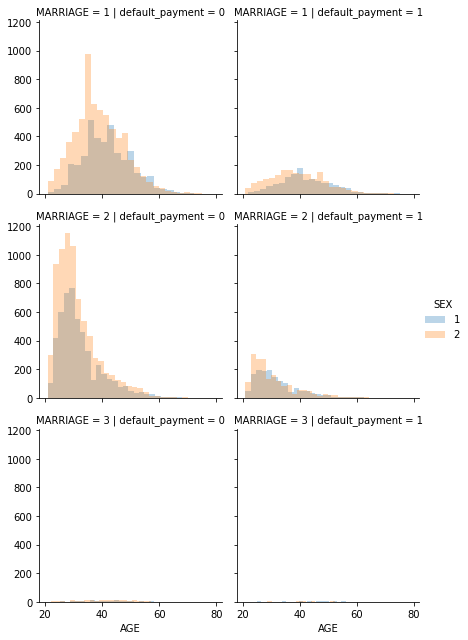

In [51]:
g = sns.FacetGrid(df, col='default_payment', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()

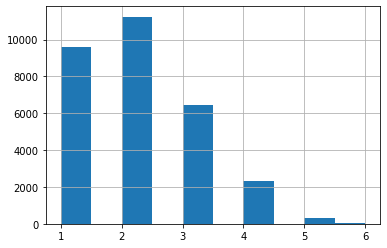

In [52]:
df['AgeBin'] = 0 #creates a column of 0
df.loc[((df['AGE'] > 20) & (df['AGE'] < 30)) , 'AgeBin'] = 1
df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'AgeBin'] = 2
df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)) , 'AgeBin'] = 3
df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'AgeBin'] = 4
df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'AgeBin'] = 5
df.loc[((df['AGE'] >= 70) & (df['AGE'] < 81)) , 'AgeBin'] = 6
df.AgeBin.hist()

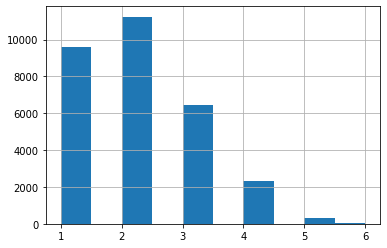

In [53]:
bins = [20, 29, 39, 49, 59, 69, 81]
bins_names = [1, 2, 3, 4, 5, 6]
df['AgeBin2'] = pd.cut(df['AGE'], bins, labels=bins_names)
df.AgeBin2.hist()

We notice 2 things:
* the bins have to be defined in a slightly counter intuitive way (at first) due to the fact that it includes the upper limit (as you can check by just changing the bins). You can play with the option "right" that is True by default
* the bins names have to be less numerous than the bins, i.e. with one bin you do bins = [20,81] and bins_names = [ 1 ] 

There is actually a faster way of doing 6 bins with cut, at the price of losing control on how big these bins are

In [54]:
df['AgeBin3'] = pd.cut(df['AGE'], 6)
df.AgeBin3.value_counts()

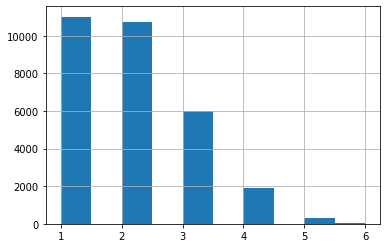

In [55]:
df['AgeBin3'] = pd.cut(df['AGE'], 6, labels=bins_names) #just added one option
df.AgeBin3.hist()

Another way of cutting a countinuos variable can be with a quantile-based discretization. This is done by the function qcut

This can be useful if, for example, you have outliers (like in the balance variable it is possible there will be some) because those outliers would just fall into the extremal categories.

In [56]:
df['AgeBin4'] = pd.qcut(df['AGE'], 6)
df.AgeBin4.value_counts()

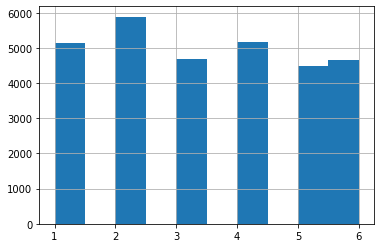

In [57]:
df['AgeBin4'] = pd.qcut(df['AGE'], 6, labels=bins_names)
df.AgeBin4.hist()

We don't need all of them. The normal cut is easier to explain, but I need to get rid to the category 6 since it is not populated enough and can ruin the model. I will group it with the 5, effectively treating every client over 60 in the same way.

I will get rid of all the others.

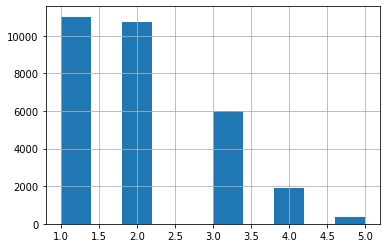

In [58]:
del df['AgeBin2']
del df['AgeBin3']
del df['AgeBin4'] # we don't need these any more
df['AgeBin'] = pd.cut(df['AGE'], 6, labels = [1,2,3,4,5,6])
#because 1 2 3 ecc are "categories" so far and we need numbers
df['AgeBin'] = pd.to_numeric(df['AgeBin'])
df.loc[(df['AgeBin'] == 6) , 'AgeBin'] = 5
df.AgeBin.hist()

In [59]:
corr_2_cols('AgeBin', 'default_payment')

default_payment,0,1,perc
AgeBin,,,
1,8542,2471,0.224371
2,8524,2189,0.204331
3,4606,1399,0.232973
4,1449,481,0.249223
5,243,96,0.283186


In [60]:
corr_2_cols('AgeBin', 'SEX')

SEX,1,2,perc
AgeBin,,,
1,3842,7171,0.651140
2,4363,6350,0.592738
3,2587,3418,0.569192
4,917,1013,0.524870
5,179,160,0.471976


**Correlation of Amount of bill statement in April - September 2005.**

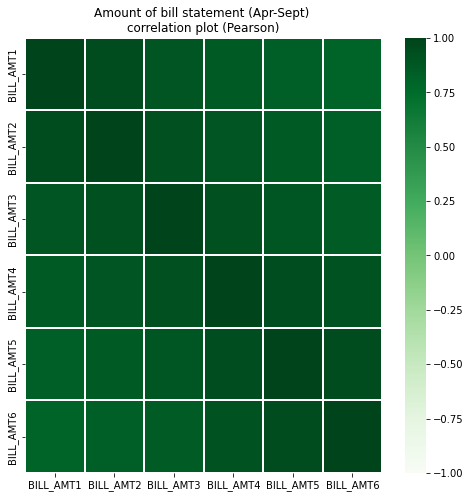

In [61]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1,cmap="Greens")
plt.show()

**Correlation of Amount of previous payment in April - September 2005.**

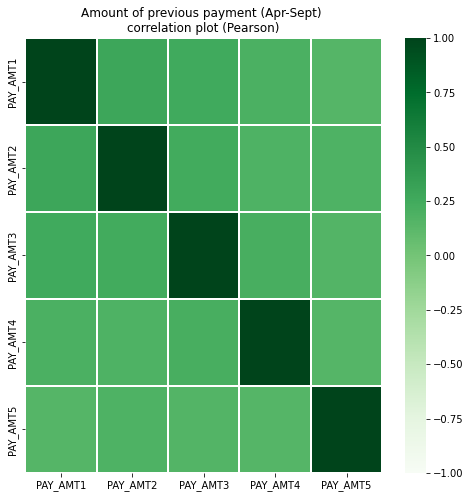

In [62]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, cmap="Greens")
plt.show()

**Correlation between Repayment status in April - September 2005.**

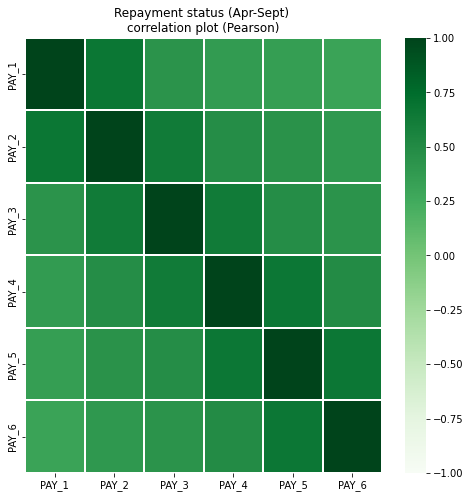

In [63]:
var = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr =df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, cmap="Greens")
plt.show()

# Observing Correlation between features of the Dataset

In [64]:
correlation = df.corr()

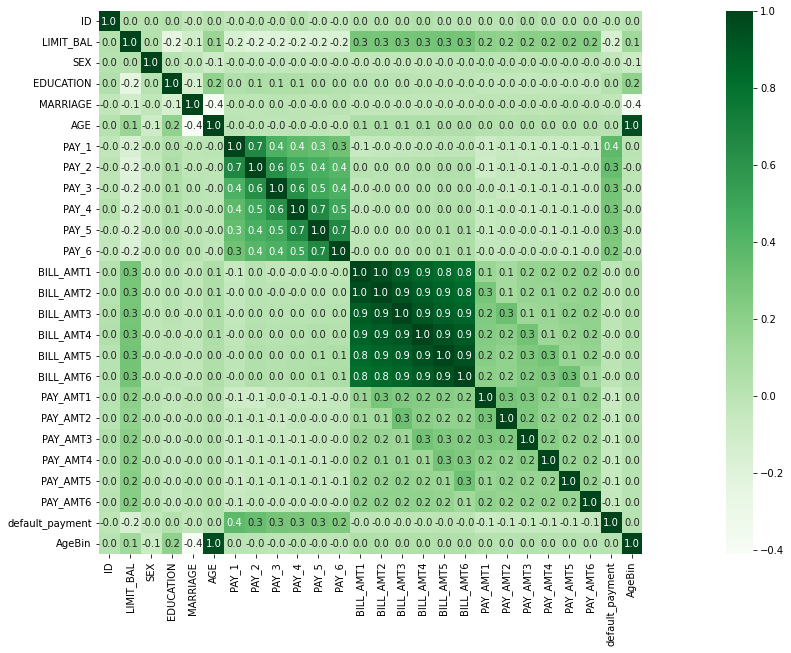

In [65]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f", cmap="Greens" ) 

In [66]:
# So it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables

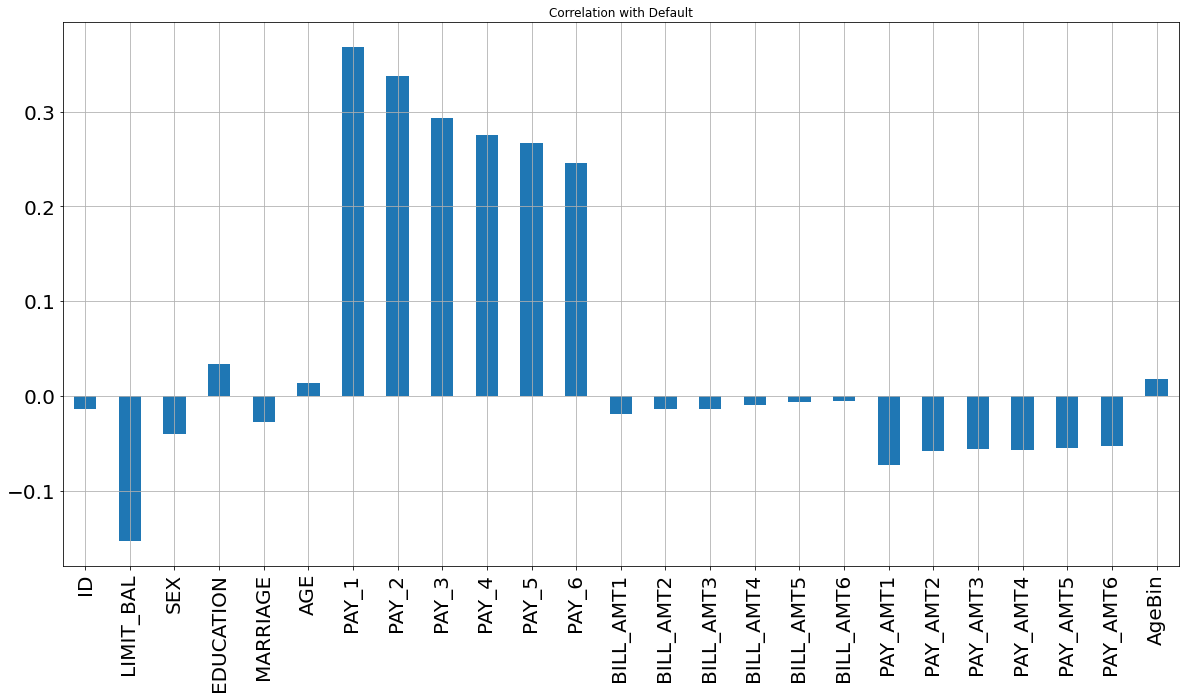

In [67]:
X = df.drop(['default_payment'],axis=1)
X.corrwith(df['default_payment']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

# Data Analysis

In [68]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [69]:
X_train.shape

(21000, 25)

In [70]:
X_test.shape

(9000, 25)

### Logistic Regression

In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used

In [71]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,plot_roc_curve,accuracy_score

In [72]:
def res(y_test_valid,y_train_valid):
    cm_log = confusion_matrix(y_test,y_test_valid)
    ConfusionMatrixDisplay(cm_log).plot()
    print(classification_report(y_test,y_test_valid))
    print('train_accuracy:',accuracy_score(y_train,y_train_valid))
    print('test_accuracy:',accuracy_score(y_test,y_test_valid))

              precision    recall  f1-score   support

           1       0.44      0.54      0.48      3299
           2       0.42      0.63      0.50      3265
           3       0.10      0.00      0.00      1757
           4       0.00      0.00      0.00       574
           5       0.00      0.00      0.00       105

    accuracy                           0.43      9000
   macro avg       0.19      0.23      0.20      9000
weighted avg       0.33      0.43      0.36      9000

train_accuracy: 0.42104761904761906
test_accuracy: 0.4268888888888889


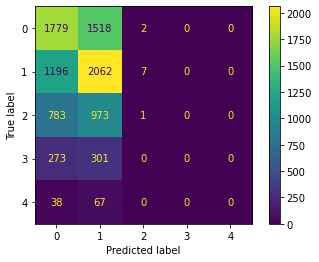

In [73]:
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression()
log_model.fit(X_train,y_train)
y_pred_log = log_model.predict(X_test)
y_pred_train = log_model.predict(X_train)
res(y_pred_log,y_pred_train)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.26      0.29      0.27      3299
           2       0.00      0.00      0.00      3265
           3       0.00      0.00      0.00      1757
           4       0.00      0.00      0.00       574
           5       0.00      0.00      0.00       105

    accuracy                           0.11      9000
   macro avg       0.04      0.05      0.05      9000
weighted avg       0.09      0.11      0.10      9000

train_accuracy: 0.10428571428571429
test_accuracy: 0.10566666666666667


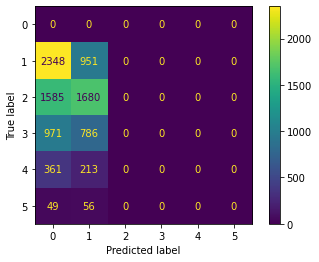

In [74]:
threshold = 0.36
y_log_prob =  log_model.predict_proba(X_test)
y_train_log_prob = log_model.predict_proba(X_train)
y_log_prob=y_log_prob[:,1]
y_train_log_prob= y_train_log_prob[:,1]
y_pred_log_prob = np.where(y_log_prob>threshold,1,0)
y_pred_log_prob_train = np.where(y_train_log_prob>threshold,1,0)
res(y_pred_log_prob,y_pred_log_prob_train)

### Using Decision Tree


The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.

### Advantages of Decision Trees

Decision trees are easy to interpret. To build a decision tree requires little data preparation from the user- there is no need to normalize data

### Disadvantages of Decision Trees

Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper.

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3299
           2       1.00      1.00      1.00      3265
           3       1.00      1.00      1.00      1757
           4       1.00      1.00      1.00       574
           5       1.00      1.00      1.00       105

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000

train_accuracy: 1.0
test_accuracy: 1.0


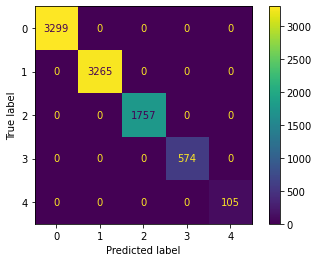

In [75]:
#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dec_model = DecisionTreeClassifier()
dec_model.fit(X_train,y_train)
y_pred_dec = dec_model.predict(X_test)
y_pred_dec_train = dec_model.predict(X_train)
res(y_pred_dec,y_pred_dec_train)

In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV

parameters = {'max_depth':[1,2,3,4,5,6],'min_samples_split':[3,4,5,6,7],'min_samples_leaf':[1,2,3,4,5,6]}
tree = GridSearchCV(dec_model, parameters,cv=10)
tree.fit(X_train,y_train)
tree.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3299
           2       1.00      1.00      1.00      3265
           3       1.00      1.00      1.00      1757
           4       1.00      1.00      1.00       574
           5       1.00      1.00      1.00       105

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000

train_accuracy: 1.0
test_accuracy: 1.0


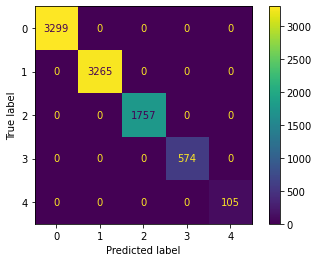

In [77]:
# We know that Decision tree will have high variance due to which the model overfit hence we can reduce this by "Pruning"
# By using the best parameter from GridSearchCV best parameters
dec_model1 = DecisionTreeClassifier(max_depth=4,min_samples_split=10,min_samples_leaf=1)
dec_model1.fit(X_train,y_train)
y_pred_dec1 = dec_model1.predict(X_test)
y_pred_dec_train1 = dec_model1.predict(X_train)
res(y_pred_dec1,y_pred_dec_train1)

## KNN Model

KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.

We can implement a KNN model by following the below steps:

- Load the data
- Initialise the value of k
- For getting the predicted class, iterate from 1 to total number of training data points
- Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance     metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
- Sort the calculated distances in ascending order based on distance values
- Get top k rows from the sorted array
- Get the most frequent class of these rows
- Return the predicted class

Let's go ahead and use the elbow method to pick a good K Value!

### Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
error_rate = []

# Will take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

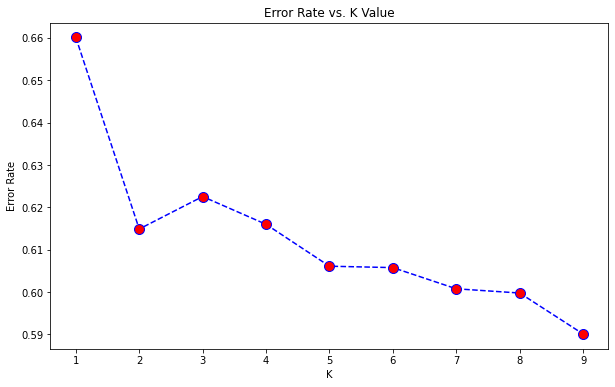

In [80]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

              precision    recall  f1-score   support

           1       0.41      0.59      0.49      3299
           2       0.42      0.43      0.42      3265
           3       0.22      0.10      0.14      1757
           4       0.11      0.02      0.04       574
           5       0.00      0.00      0.00       105

    accuracy                           0.39      9000
   macro avg       0.23      0.23      0.22      9000
weighted avg       0.35      0.39      0.36      9000

train_accuracy: 0.5635238095238095
test_accuracy: 0.3938888888888889


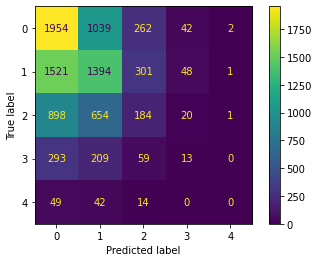

In [81]:
# By using the elbow graph we can see that the k=5 will perform better in the first place so impute k = 5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)
y_pred_knn_train = knn_model.predict(X_train)

res(y_pred_knn,y_pred_knn_train)

# Random Forest Model

Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

- Pick at random K data points from the training set

- Build the Decision tree associated to these K data points

- Choose the Number of trees(n) you want to build and repeat STEP1 and STEP2

- For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new   data point to the category that wins the majority vote

In [82]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3299
           2       1.00      1.00      1.00      3265
           3       1.00      1.00      1.00      1757
           4       0.93      0.99      0.96       574
           5       1.00      0.54      0.70       105

    accuracy                           0.99      9000
   macro avg       0.98      0.91      0.93      9000
weighted avg       0.99      0.99      0.99      9000

train_accuracy: 1.0
test_accuracy: 0.9943333333333333


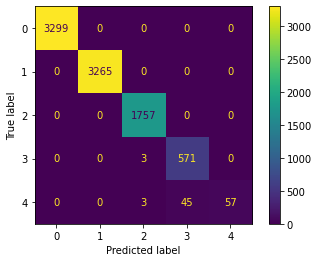

In [83]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)
res(y_pred_rf,y_pred_rf_train)

In [84]:
# Decision trees frequently perform well on imbalanced data.
#so using RandomForest uses bagging of n_trees will be a better idea.

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3299
           2       0.93      1.00      0.96      3265
           3       0.72      0.89      0.80      1757
           4       0.00      0.00      0.00       574
           5       0.00      0.00      0.00       105

    accuracy                           0.90      9000
   macro avg       0.53      0.58      0.55      9000
weighted avg       0.84      0.90      0.87      9000

train_accuracy: 0.9024761904761904
test_accuracy: 0.9034444444444445


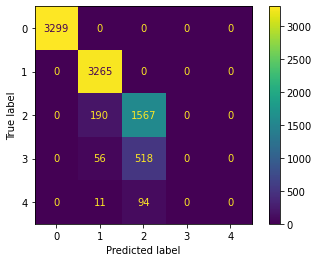

In [85]:
rf_model = RandomForestClassifier(n_estimators=70, max_depth=5, min_samples_leaf=4, min_samples_split=3)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)
res(y_pred_rf,y_pred_rf_train)

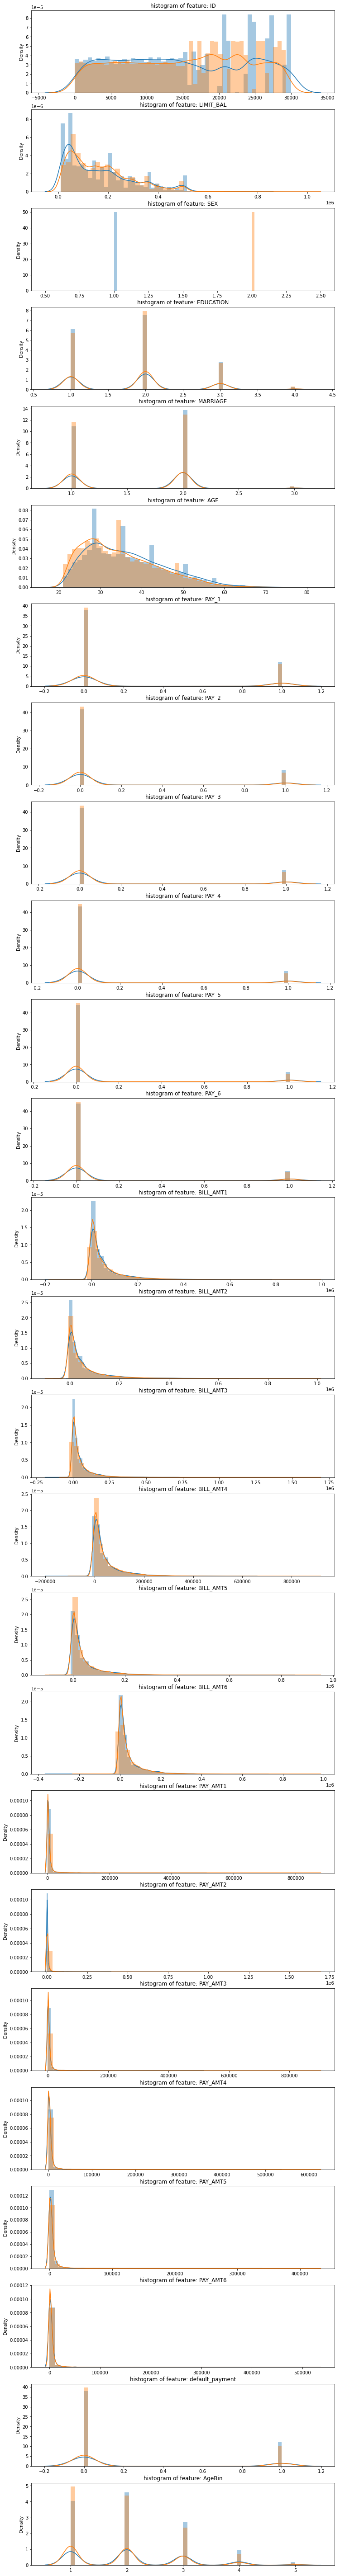

In [86]:
from matplotlib import gridspec
# distribution of anomalous features
features = df.iloc[:,0:28].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[c][df.SEX == 1], bins=50)
    sns.distplot(df[c][df.SEX == 2], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()